In [44]:
# !pip install geopandas
# !pip install imbalanced-learn
# !pip install -u scikit-learn

In [76]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.colors as colors

In [46]:
data = pd.read_csv('/Users/lucas/Data/US_Accidents_March23.csv')
# data = pd.read_csv('/Users/lucaswin/Data/US_Accidents_March23.csv')

In [47]:
df = data
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [48]:
# print(df.shape)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

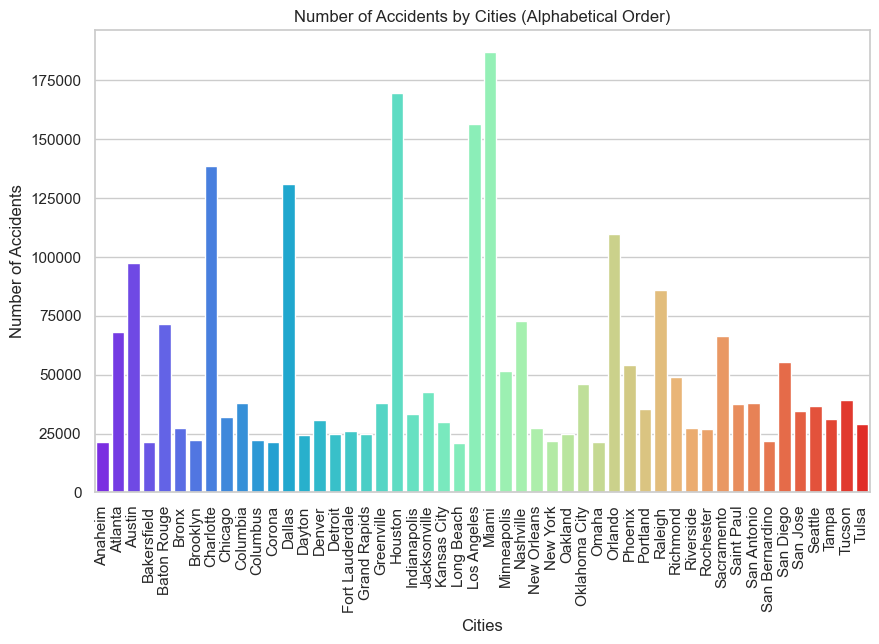

In [49]:
accidents_cities = df['City'].value_counts().head(50)
cities_order = sorted(accidents_cities.index)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City', order=cities_order, palette='rainbow')
plt.xlabel('Cities')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Cities (Alphabetical Order)')
plt.xticks(rotation=90)
plt.show()

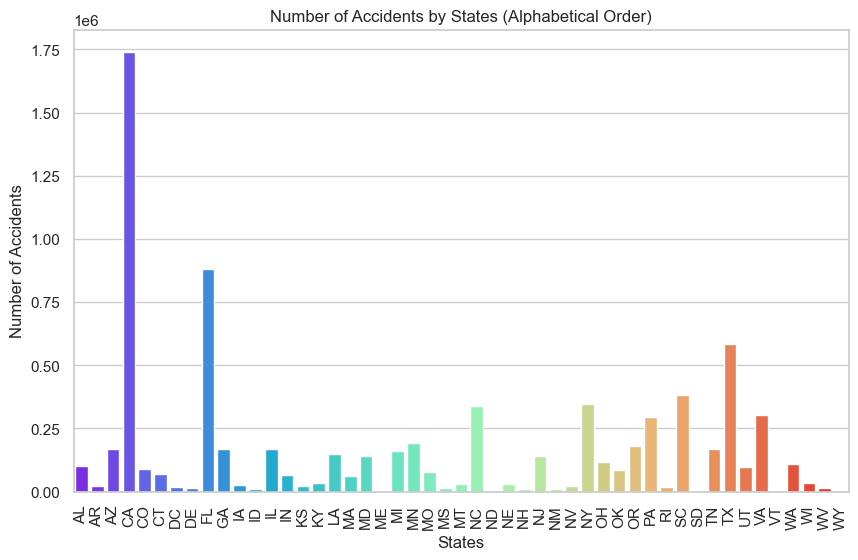

In [50]:
accidents_states = df['State'].value_counts()
states_order = sorted(accidents_states.index)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State', order=states_order, palette='rainbow')
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by States (Alphabetical Order)')
plt.xticks(rotation=90)
plt.show()

# Accidents in California

In [51]:
df_ca = df[df['State'] == 'CA']
# print(df_ca.info())

In [52]:
columns_to_remove = ['ID', 'Source', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
                     'State', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 
                     'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df_ca_cleaned = df_ca.drop(columns=columns_to_remove)
df_ca_cleaned = df_ca_cleaned.dropna()
# df_ca_cleaned

# Detecting Outliers

In [53]:
selected_columns = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
df_selected = df_ca_cleaned[selected_columns]
# df_selected

### Using z-score

In [54]:
z_scores = np.abs((df_selected - df_selected.mean()) / df_selected.std())
outliers_count = z_scores[z_scores > 3].count()

print(outliers_count)

Temperature(F)        2562
Wind_Chill(F)         3278
Humidity(%)              0
Pressure(in)         25725
Visibility(mi)       26620
Wind_Speed(mph)      10089
Precipitation(in)    14135
dtype: int64


### Using Interquartile Range

In [55]:
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_selected[(df_selected < lower_bound) | (df_selected > upper_bound)]
outliers_count = outliers.count()

print(outliers_count)

Temperature(F)        11974
Wind_Chill(F)         16540
Humidity(%)               0
Pressure(in)          89430
Visibility(mi)       256377
Wind_Speed(mph)       10089
Precipitation(in)     53071
dtype: int64


# Severity Distribution

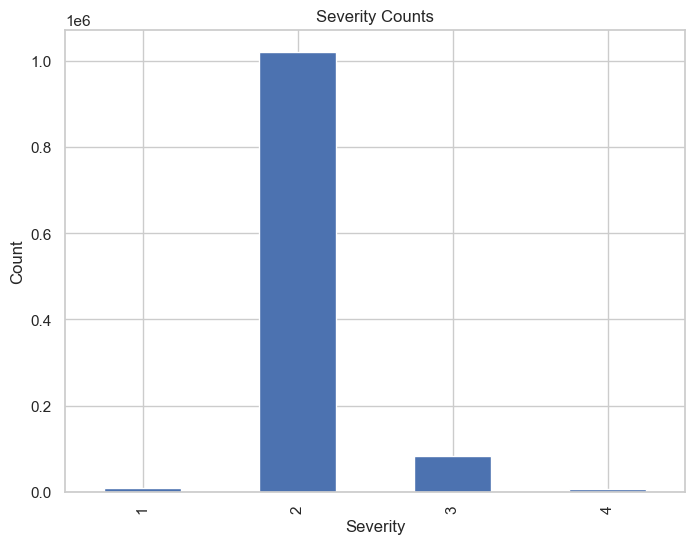

In [56]:
severity_counts = df_ca_cleaned['Severity'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Severity Counts')
plt.show()

# Accident Frequency Analysis 

### Location-Based Analysis

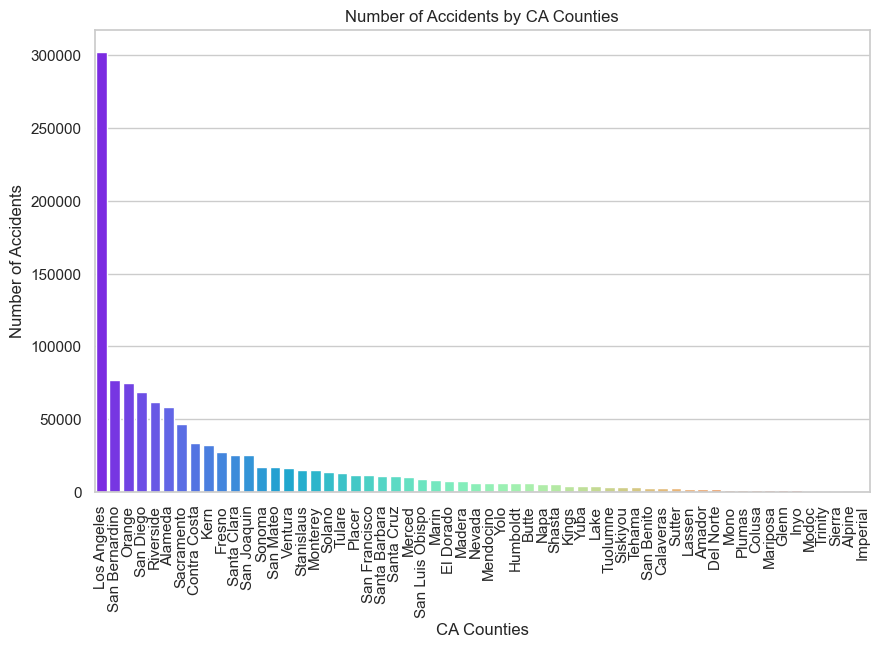

In [57]:
accidents_ca_county = df_ca_cleaned['County'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_ca_county.index, y=accidents_ca_county.values, palette="rainbow")

plt.xlabel('CA Counties')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by CA Counties')
plt.xticks(rotation=90)
plt.show()

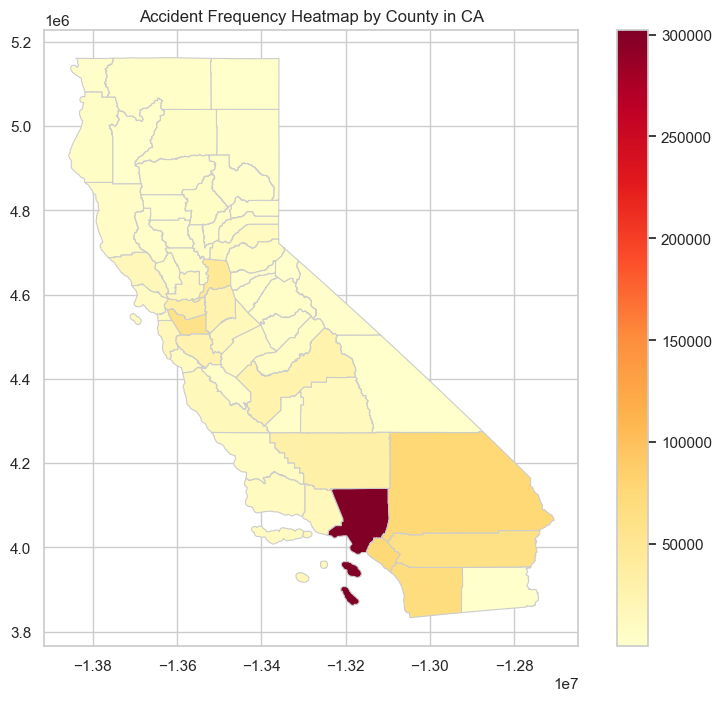

In [58]:
counties_shapefile = gpd.read_file('./CA_Counties/CA_Counties_TIGER2016.shp')
merged_data_counties = counties_shapefile.merge(accidents_ca_county, left_on='NAME', right_index=True)

fig, ax = plt.subplots(figsize=(10, 8))
merged_data_counties.plot(column='County', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Accident Frequency Heatmap by County in CA')
plt.show()

Zipcode with most accidents: 91761


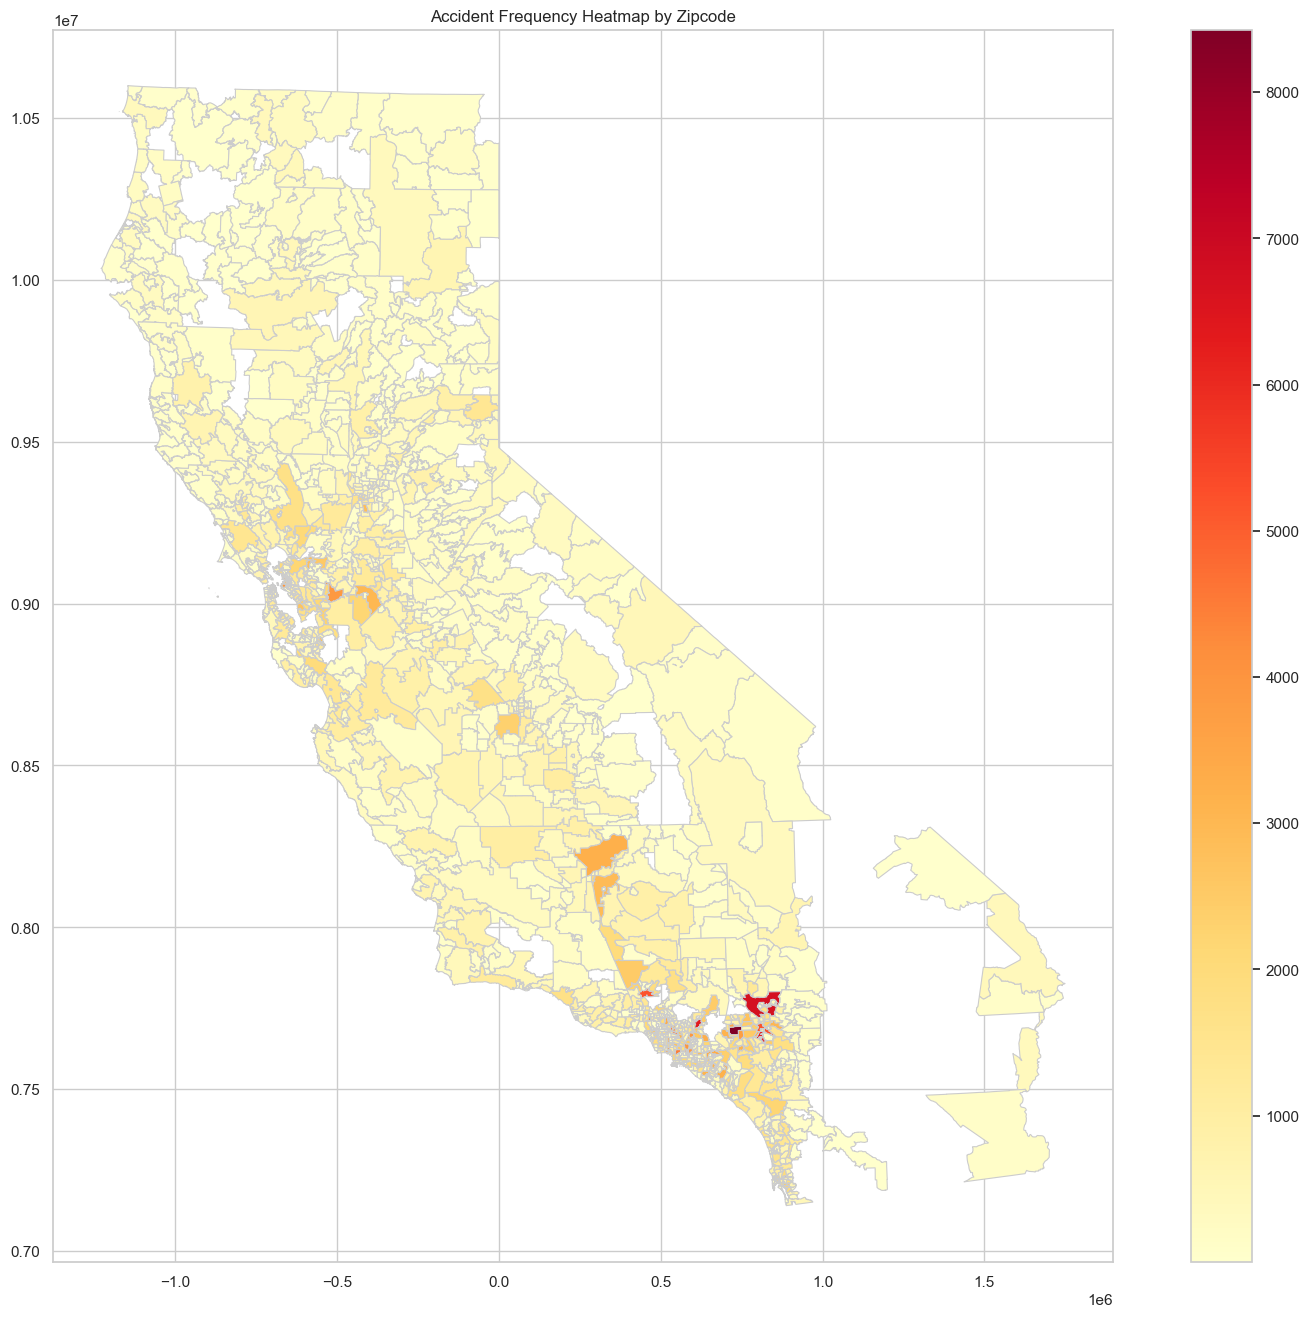

In [81]:
accidents_ca_zipcode = df_ca_cleaned['Zipcode'].value_counts()
zipcode_with_most_accidents = accidents_ca_zipcode.idxmax()
print("Zipcode with most accidents:", zipcode_with_most_accidents)

zipcodes_shapefile = gpd.read_file('./CA_Zipcodes/California_Zip_Codes.shp')
merged_data_zipcodes = zipcodes_shapefile.merge(accidents_ca_zipcode, left_on='ZIP_CODE', right_index=True)

fig, ax = plt.subplots(figsize=(20, 16))
merged_data_zipcodes.plot(column='Zipcode', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Accident Frequency Heatmap by Zipcode')
plt.show()

### Time-Based Analysis

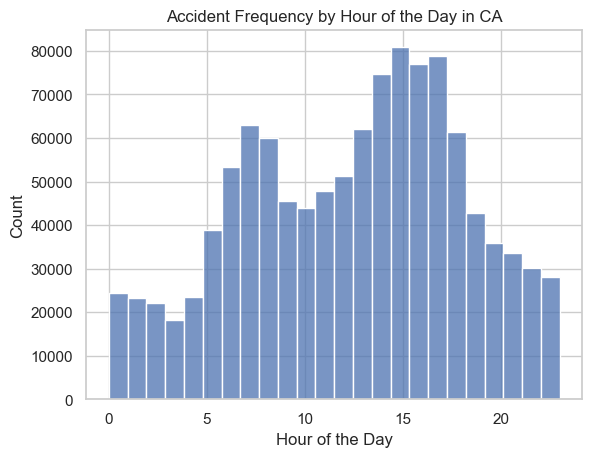

In [21]:
df_ca_cleaned['Hour'] = pd.to_datetime(df_ca_cleaned['Start_Time']).dt.hour
hourly_accident_freq = df_ca_cleaned['Hour'].value_counts().sort_index()

sns.histplot(data=df_ca_cleaned, x='Hour', bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Accident Frequency by Hour of the Day in CA')
plt.show()

### Temperature-Based Analysis

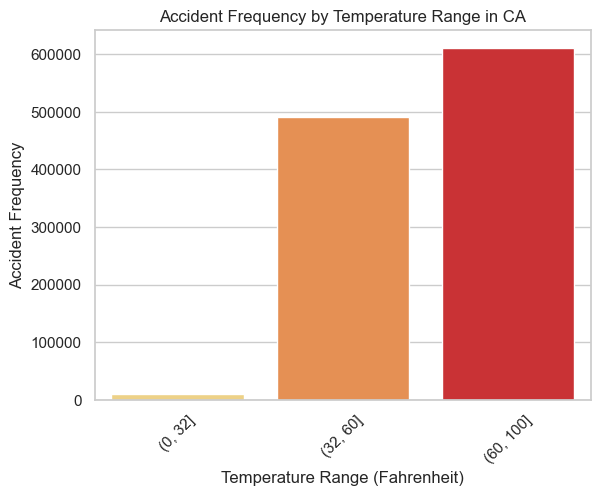

In [22]:
temperature_ranges = pd.cut(df_ca_cleaned['Temperature(F)'], bins=[0, 32, 60, 100])
temperature_accident_freq = df_ca_cleaned.groupby(temperature_ranges).size().reset_index(name='Accident Frequency')

sns.barplot(data=temperature_accident_freq, x='Temperature(F)', y='Accident Frequency', palette='YlOrRd')
plt.xlabel('Temperature Range (Fahrenheit)')
plt.ylabel('Accident Frequency')
plt.title('Accident Frequency by Temperature Range in CA')
plt.xticks(rotation=45)
plt.show()

### Weather Impact Analysis

In [ ]:
# weather_cols = ['Temperature(F)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Visibility(mi)', 'Severity']
# weather_df = df_ca_cleaned[weather_cols]
# sns.pairplot(weather_df, hue='Severity')
# plt.title('Weather Impact on Accident Severity')
# plt.show()

# Data Cleaning and One Hot Encoding

In [24]:
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Rain|Drizzle|Shower|Precipitation", na=False), "Weather_Condition"] = "Rain"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Cloudy|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Fog|Mist", na=False), "Weather_Condition"] = "Fog"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Clear|Fair", na=False), "Weather_Condition"] = "Clear"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"

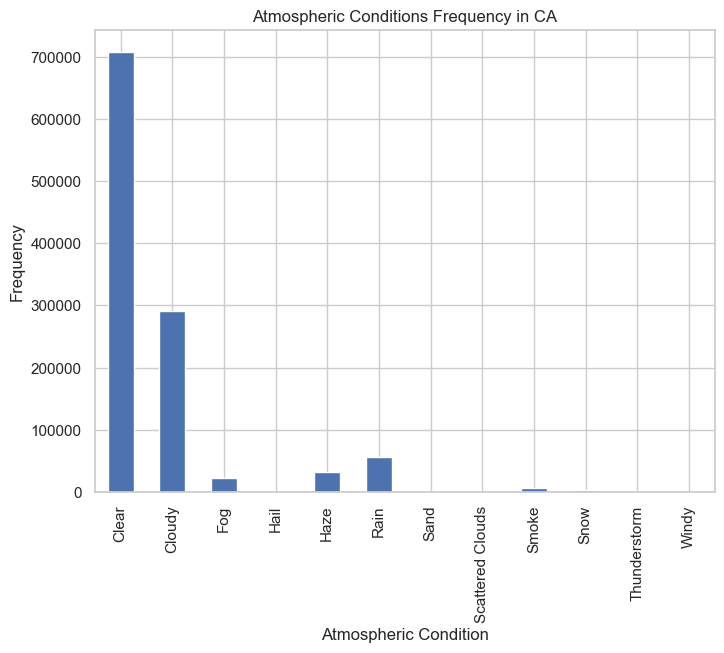

In [41]:
weather_condition_counts = df_ca_cleaned['Weather_Condition'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
weather_condition_counts.plot(kind='bar')
plt.xlabel('Atmospheric Condition')
plt.ylabel('Frequency')
plt.title('Atmospheric Conditions Frequency in CA')
plt.xticks(rotation=90)
plt.show()

### One Hot Encode Atmospheric Conditions

In [32]:
df_weather_ohe = pd.get_dummies(df_ca_cleaned['Weather_Condition'])
df_ca_cleaned_ohe = pd.concat([df_ca_cleaned, df_weather_ohe], axis=1)
# print(df_ca_cleaned_ohe)

### One Hot Encode Day/Night

In [33]:
df_daytime_ohe = pd.get_dummies(df_ca_cleaned['Sunrise_Sunset'])
df_ca_cleaned_ohe = pd.concat([df_ca_cleaned_ohe, df_daytime_ohe], axis=1)
# print(df_ca_cleaned_ohe)

# Correlation Matrix

In [29]:
selected_columns = ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)','Pressure(in)', 
                    'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
corr_mat = df_ca_cleaned[selected_columns].corr()
# corr_mat

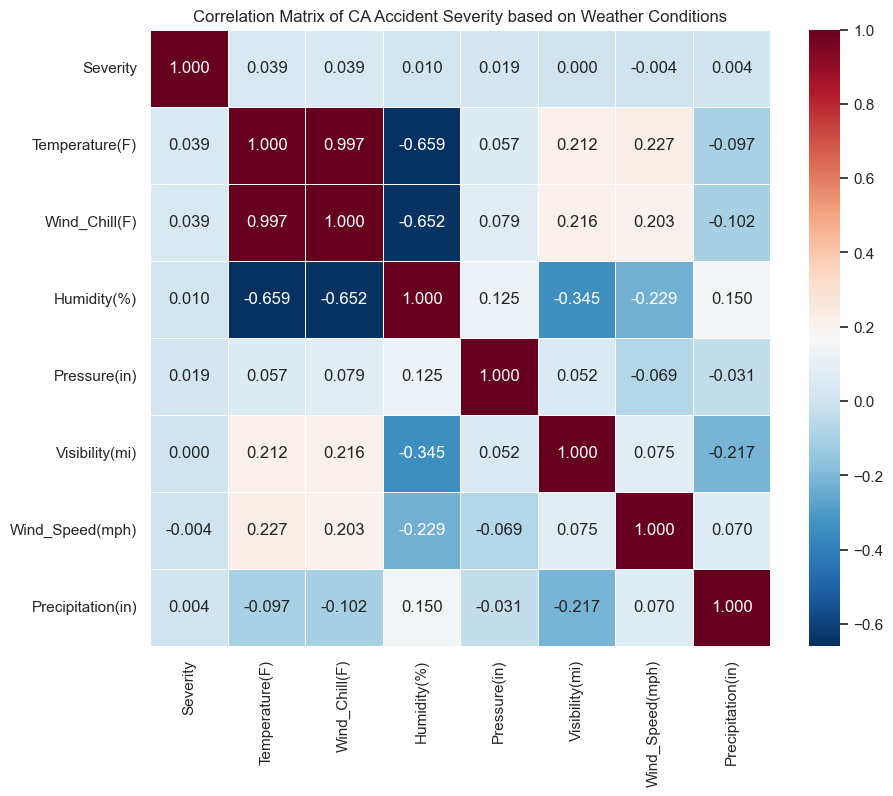

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt='.3f', cmap='RdBu_r', linewidths=0.5)
plt.title('Correlation Matrix of CA Accident Severity based on Weather Conditions')
plt.show()

In [34]:
selected_columns_2 = ['Severity', 'Clear', 'Cloudy', 'Rain', 'Haze', 'Fog', 'Smoke', 'Snow', 
                    'Thunderstorm', 'Windy', 'Sand', 'Scattered Clouds', 'Hail', 'Day', 'Night']
corr_mat_2 = df_ca_cleaned_ohe[selected_columns_2].corr()
# corr_mat_2

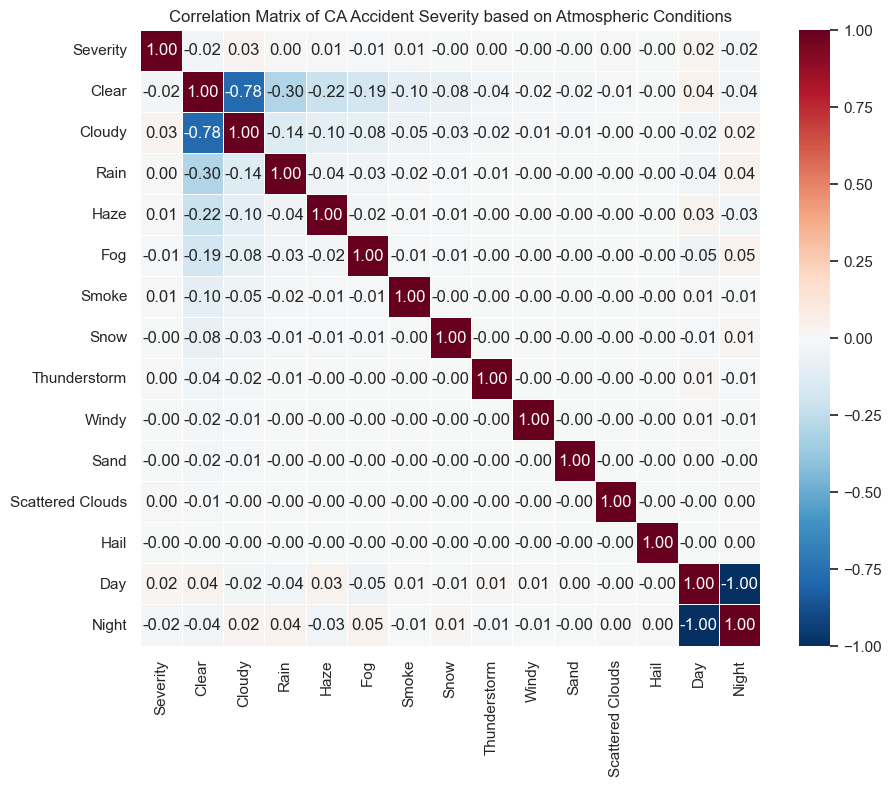

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat_2, annot=True, fmt='.2f', cmap='RdBu_r', linewidths=0.5)
plt.title('Correlation Matrix of CA Accident Severity based on Atmospheric Conditions')
plt.show()

In [36]:
selected_columns_3 = ['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
corr_mat_3 = df_ca_cleaned[selected_columns_3].corr()
# corr_mat_3

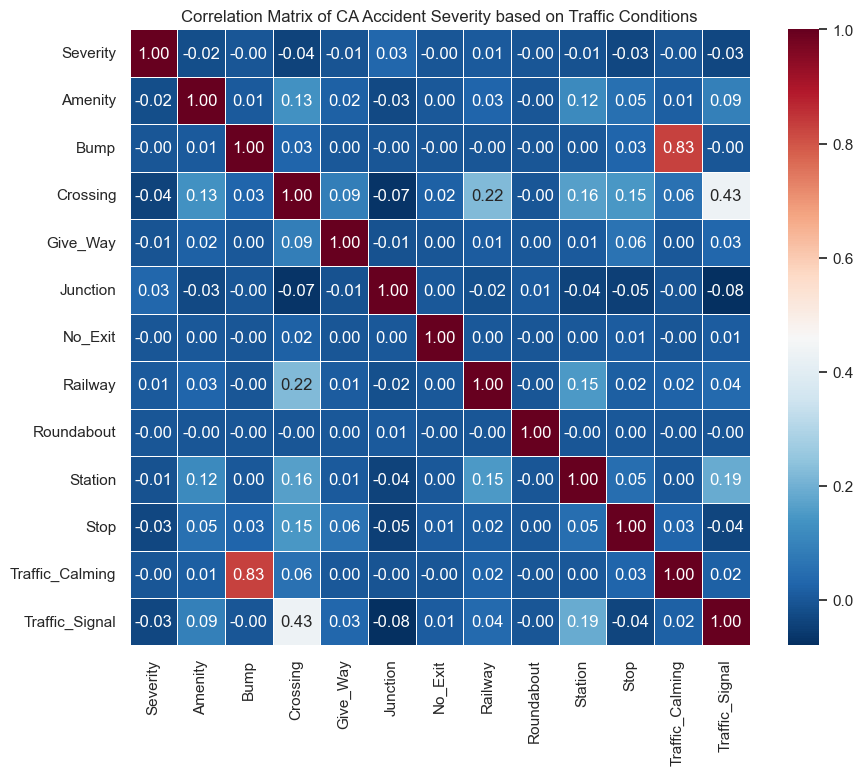

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat_3, annot=True, fmt='.2f', cmap='RdBu_r', linewidths=0.5)
plt.title('Correlation Matrix of CA Accident Severity based on Traffic Conditions')
plt.show()

# Baseline Prediction

In [29]:
# categorical_cols = ['Street', 'City', 'County', 'Zipcode', 'Weather_Condition', 'Sunrise_Sunset']
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     df_ca_cleaned[col] = label_encoder.fit_transform(df_ca_cleaned[col])

# X = df_ca_cleaned.drop('Severity', axis=1)
# y = df_ca_cleaned['Severity']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

## Severity Prediction with Correlated Features using Raw Data

In [31]:
X = df_ca_cleaned[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                   'Visibility(mi)', 'Precipitation(in)', 'Junction', 'Railway']]
y = df_ca_cleaned['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.35      0.12      0.18      1724
           2       0.92      0.98      0.95    204448
           3       0.23      0.07      0.10     16410
           4       0.49      0.21      0.29      1437

    accuracy                           0.90    224019
   macro avg       0.50      0.34      0.38    224019
weighted avg       0.86      0.90      0.88    224019



In [33]:
rfc_scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
print('RFC Cross-Validation Scores:', rfc_scores)
print('RFC Mean Cross-Validation Accuracy:', rfc_scores.mean())

RFC Cross-Validation Scores: [0.87788536 0.89694132 0.89655296 0.88460302 0.84644537]
RFC Mean Cross-Validation Accuracy: 0.8804856057233277


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# for i in range(1, 6):
#     print('K: ', i)
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train_scaled, y_train)

#     y_pred = knn.predict(X_test_scaled)
#     print(classification_report(y_test, y_pred))

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           1       0.13      0.25      0.17      1724
           2       0.92      0.98      0.95    204448
           3       0.19      0.03      0.05     16410
           4       0.63      0.13      0.21      1437

    accuracy                           0.90    224019
   macro avg       0.47      0.35      0.34    224019
weighted avg       0.86      0.90      0.87    224019



In [35]:
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print('KNN Cross-Validation Scores:', knn_scores)
print('KNN Mean Cross-Validation Accuracy:', knn_scores.mean())

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN Cross-Validation Scores: [0.80757436 0.86573847 0.85502504 0.86235035 0.83647743]
KNN Mean Cross-Validation Accuracy: 0.8454331280751035


## Severity Prediction with Correlated Features using Undersampling Method

In [36]:
X = df_ca_cleaned[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                   'Visibility(mi)', 'Precipitation(in)', 'Junction', 'Railway']]
y = df_ca_cleaned['Severity']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.58      0.53      1404
           2       0.38      0.34      0.36      1517
           3       0.36      0.35      0.35      1455
           4       0.53      0.53      0.53      1468

    accuracy                           0.45      5844
   macro avg       0.44      0.45      0.44      5844
weighted avg       0.44      0.45      0.44      5844



In [39]:
rfc_scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
print('RFC Cross-Validation Scores:', rfc_scores)
print('RFC Mean Cross-Validation Accuracy:', rfc_scores.mean())

RFC Cross-Validation Scores: [0.8778675  0.89646368 0.89639672 0.88421466 0.84687391]
RFC Mean Cross-Validation Accuracy: 0.8803632941393081


In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.40      0.69      0.51      1404
           2       0.35      0.40      0.37      1517
           3       0.36      0.25      0.29      1455
           4       0.61      0.29      0.40      1468

    accuracy                           0.40      5844
   macro avg       0.43      0.41      0.39      5844
weighted avg       0.43      0.40      0.39      5844



C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print('KNN Cross-Validation Scores:', knn_scores)
print('KNN Mean Cross-Validation Accuracy:', knn_scores.mean())

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN Cross-Validation Scores: [0.80757436 0.86573847 0.85502504 0.86235035 0.83647743]
KNN Mean Cross-Validation Accuracy: 0.8454331280751035


## Severity Prediction with Correlated Features using Oversampling Method

In [43]:
X = df_ca_cleaned[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                   'Visibility(mi)', 'Precipitation(in)', 'Junction', 'Railway']]
y = df_ca_cleaned['Severity']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.85      0.85    204362
           2       0.81      0.85      0.83    204264
           3       0.75      0.71      0.73    204684
           4       0.89      0.88      0.88    204136

    accuracy                           0.83    817446
   macro avg       0.83      0.83      0.83    817446
weighted avg       0.83      0.83      0.83    817446



In [45]:
rfc_scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
print('RFC Cross-Validation Scores:', rfc_scores)
print('RFC Mean Cross-Validation Accuracy:', rfc_scores.mean())

RFC Cross-Validation Scores: [0.87768448 0.89643243 0.89678508 0.88401825 0.84678017]
RFC Mean Cross-Validation Accuracy: 0.8803400818822755


In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           1       0.79      0.91      0.85    204362
           2       0.68      0.85      0.76    204264
           3       0.74      0.55      0.63    204684
           4       0.92      0.79      0.85    204136

    accuracy                           0.78    817446
   macro avg       0.78      0.78      0.77    817446
weighted avg       0.78      0.78      0.77    817446



In [47]:
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print('KNN Cross-Validation Scores:', knn_scores)
print('KNN Mean Cross-Validation Accuracy:', knn_scores.mean())

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN Cross-Validation Scores: [0.80757436 0.86573847 0.85502504 0.86235035 0.83647743]
KNN Mean Cross-Validation Accuracy: 0.8454331280751035


## Severity Prediction with Correlated Features using Both Under/Oversampling Methods

In [48]:
X = df_ca_cleaned[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                   'Visibility(mi)', 'Precipitation(in)', 'Junction', 'Railway']]
y = df_ca_cleaned['Severity']

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99    128759
           2       0.97      0.99      0.98    128008
           3       0.97      0.95      0.96     87439
           4       0.99      0.99      0.99    142707

    accuracy                           0.98    486913
   macro avg       0.98      0.98      0.98    486913
weighted avg       0.98      0.98      0.98    486913



In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           1       0.95      0.98      0.97    128759
           2       0.92      0.96      0.94    128008
           3       0.95      0.88      0.91     87439
           4       0.98      0.95      0.97    142707

    accuracy                           0.95    486913
   macro avg       0.95      0.95      0.95    486913
weighted avg       0.95      0.95      0.95    486913



In [51]:
knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print('KNN Cross-Validation Scores:', knn_scores)
print('KNN Mean Cross-Validation Accuracy:', knn_scores.mean())

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN Cross-Validation Scores: [0.80757436 0.86573847 0.85502504 0.86235035 0.83647743]
KNN Mean Cross-Validation Accuracy: 0.8454331280751035


In [ ]:
# new_instance = [[78.0, 54, 10.0, 0.00]]
# severity_prediction = knn.predict(new_instance)
# print("Severity prediction:", severity_prediction)